In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata

sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                         10.0.1
anyio                       NA
arrow                       1.2.3
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.12.1
backcall                    0.2.0
brotli                      1.1.0
certifi                     2023.07.22
cffi                        1.15.1
charset_normalizer          3.2.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.1.3
executing                   1.2.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.8.0
idna                        3.4
igraph                      0.10.8
importlib_resources         NA
ipykerne

In [2]:
adata_hum = sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Tabula_immune.h5ad')
adata_pl =sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleenR1.h5ad')

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

In [4]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [4]:
adata_pl.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'gene26603', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'NU5M.1', 'COX1.1', 'COX1.2', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [5]:
gene_pairs=pd.read_csv("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Final_Data/Tabula_Immune_Gene_pairs_ct_pw&hs_.csv")

In [6]:
gene_pairs

,Unnamed: 0.1,Unnamed: 0,hs_B cell;pw_1,hs_B cell;pw_1_pval1,hs_B cell;pw_1_pval2,hs_CD4-positive helper T cell;pw_3,hs_CD4-positive helper T cell;pw_3_pval1,hs_CD4-positive helper T cell;pw_3_pval2,"hs_CD4-positive, alpha-beta T cell;pw_0","hs_CD4-positive, alpha-beta T cell;pw_0_pval1",...,hs_plasma cell;pw_14_pval2,hs_platelet;pw_6,hs_platelet;pw_6_pval1,hs_platelet;pw_6_pval2,hs_thymocyte;pw_0,hs_thymocyte;pw_0_pval1,hs_thymocyte;pw_0_pval2,hs_type I NK T cell;pw_3,hs_type I NK T cell;pw_3_pval1,hs_type I NK T cell;pw_3_pval2
0,0,0,hs_ENSG00000153064;BANK1,0.0,0.0,hs_ENSG00000081059;TCF7,0.000000e+00,0.0,hs_ENSG00000168685;IL7R,0.0,...,1.324480e-07,hs_ENSG00000169704;pw_gene64519,2.427007e-38,2.609096e-288,hs_ENSG00000106018;CALCRL,6.115071e-53,3.486285e-04,hs_ENSG00000027075;PRKCQ,3.344109e-81,0.000000e+00
1,1,1,hs_ENSG00000116191;RALGPS2,0.0,0.0,hs_ENSG00000138795;TCF7,0.000000e+00,0.0,hs_ENSG00000111796;pw_gene23053,0.0,...,9.861878e-05,hs_ENSG00000169704;GP1BB,2.427007e-38,0.000000e+00,hs_ENSG00000138795;TCF7,2.561610e-83,1.564987e-214,hs_ENSG00000010810;pw_gene51743,1.623569e-227,0.000000e+00
2,2,2,hs_ENSG00000136573;TEC,0.0,0.0,hs_ENSG00000152495;PRKCQ,9.976999e-271,0.0,hs_ENSG00000198851;CD3E,0.0,...,1.127446e-24,hs_ENSG00000165682;pw_gene32908,2.694949e-27,3.457229e-251,hs_ENSG00000173585;CCR2,5.282920e-74,6.888068e-06,hs_ENSG00000010810;LCK,1.623569e-227,8.537812e-257
3,3,3,hs_ENSG00000116191;pw_gene33906,0.0,0.0,hs_ENSG00000113263;pw_gene51743,0.000000e+00,0.0,hs_ENSG00000213145;pw_gene13943,0.0,...,5.156694e-03,hs_ENSG00000259207;ITGB3,3.728509e-28,0.000000e+00,hs_ENSG00000173585;P2RY8,5.282920e-74,7.025616e-06,hs_ENSG00000074966;pw_gene51743,2.165033e-92,0.000000e+00
4,4,4,hs_ENSG00000138639;ARHGAP24,0.0,0.0,hs_ENSG00000152495;CAMK4,9.976999e-271,0.0,hs_ENSG00000167286;pw_gene26275,0.0,...,5.156694e-03,hs_ENSG00000101162;pw_gene51055,7.326514e-33,4.229733e-306,hs_ENSG00000173585;F2R,5.282920e-74,8.429166e-26,hs_ENSG00000168685;IL7R,5.276453e-136,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,994,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,995,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Create a mapping dictionary with the gene pairs columns
mapper = {}
mapper_keys_values=[]

for i in gene_pairs.columns:
    if not (i.endswith('pval1') or i.endswith('pval2')):
        for j in gene_pairs[i].index:
            if pd.isna(j):
                continue
            cell_value = gene_pairs.at[j, i]
            if isinstance(cell_value, str):
                hs_pw = cell_value.split(';')
                #Create a dictionary with the gene pairs
                mapper_keys_values.append(hs_pw)

In [56]:
mapper_keys_values

[['hs_ENSG00000153064', 'BANK1'],
 ['hs_ENSG00000116191', 'RALGPS2'],
 ['hs_ENSG00000136573', 'TEC'],
 ['hs_ENSG00000116191', 'pw_gene33906'],
 ['hs_ENSG00000138639', 'ARHGAP24'],
 ['hs_ENSG00000136573', 'BTK'],
 ['hs_ENSG00000136573', 'LYN'],
 ['hs_ENSG00000136573', 'SYK'],
 ['hs_ENSG00000007312', 'CD79B'],
 ['hs_ENSG00000012124', 'CD22'],
 ['hs_ENSG00000163534', 'CD22'],
 ['hs_ENSG00000133789', 'PLEKHA2'],
 ['hs_ENSG00000104921', 'CLEC17A'],
 ['hs_ENSG00000196092', 'pw_gene13977'],
 ['hs_ENSG00000081189', 'pw_gene16079'],
 ['hs_ENSG00000136573', 'CSK'],
 ['hs_ENSG00000132185', 'FCRL5'],
 ['hs_ENSG00000110777', 'POU2AF1'],
 ['hs_ENSG00000012124', 'pw_gene55946'],
 ['hs_ENSG00000116191', 'pw_gene61502'],
 ['hs_ENSG00000095585', 'BLNK'],
 ['hs_ENSG00000104894', 'pw_gene48399'],
 ['hs_ENSG00000167483', 'pw_gene32803'],
 ['hs_ENSG00000012124', 'FCRL5'],
 ['hs_ENSG00000136573', 'A2ML1'],
 ['hs_ENSG00000136573', 'BLK'],
 ['hs_ENSG00000012124', 'MALT1'],
 ['hs_ENSG00000164330', 'pw_gene53878

In [58]:
#Use the mapper_keys_values to create a dictionary
for i in mapper_keys_values:
    j=''
    j=i[0][3:]
    mapper[j] = i[1]

In [59]:
mapper

{'ENSG00000153064': 'PIK3AP1',
 'ENSG00000116191': 'pw_gene49932',
 'ENSG00000136573': 'pw_gene64505',
 'ENSG00000138639': 'ARHGAP22',
 'ENSG00000007312': 'CD79B',
 'ENSG00000012124': 'CEACAM4',
 'ENSG00000163534': 'CEACAM5',
 'ENSG00000133789': 'SWAP70',
 'ENSG00000104921': 'CLEC4F',
 'ENSG00000196092': 'pw_gene13977',
 'ENSG00000081189': 'pw_gene8434',
 'ENSG00000132185': 'FCRL5',
 'ENSG00000110777': 'POU2AF1',
 'ENSG00000095585': 'TMPO',
 'ENSG00000104894': 'CD53',
 'ENSG00000167483': 'FAM129A',
 'ENSG00000164330': 'pw_gene53878',
 'ENSG00000101017': 'CD40',
 'ENSG00000140968': 'IRF3',
 'ENSG00000042980': 'ADAM9',
 'ENSG00000196628': 'TCF3',
 'ENSG00000132704': 'FCRL5',
 'ENSG00000197943': 'PLCB2',
 'ENSG00000170456': 'SBF2',
 'ENSG00000122224': 'CD84',
 'ENSG00000073849': 'st6gal1',
 'ENSG00000143297': 'MUSK',
 'ENSG00000066923': 'pw_gene59913',
 'ENSG00000160683': 'CCR7',
 'ENSG00000137478': 'ARHGEF6',
 'ENSG00000152492': 'pw_gene3884',
 'ENSG00000144218': 'pw_gene59798',
 'ENSG00

In [10]:
mapper['ENSG00000248333']

'CDK6'

In [11]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [45]:
#Renaming ensemble id to gene symbol in adata_hum
#Read in gtf file
import pandas as pd

columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
# Read in the GTF file
gtf= pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf', sep='\t', comment='#', names=columns, dtype={'start': int, 'end': int}, escapechar='\\')
#gtf = pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf',skiprows=5)



/tmp/ipykernel_989895/1171495936.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gtf= pd.read_csv('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Inter_data/Homo_sapiens.GRCh38.110.chr.gtf', sep='\t', comment='#', names=columns, dtype={'start': int, 'end': int}, escapechar='\\')


In [46]:
gtf

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,gene,182696,184174,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; g..."
1,1,havana,transcript,182696,184174,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; t..."
2,1,havana,exon,182696,182746,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; t..."
3,1,havana,exon,183132,183216,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; t..."
4,1,havana,exon,183494,183571,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; t..."
...,...,...,...,...,...,...,...,...,...
3421041,MT,insdc,transcript,15888,15953,.,+,.,"gene_id ""ENSG00000210195""; gene_version ""2""; t..."
3421042,MT,insdc,exon,15888,15953,.,+,.,"gene_id ""ENSG00000210195""; gene_version ""2""; t..."
3421043,MT,insdc,gene,15956,16023,.,-,.,"gene_id ""ENSG00000210196""; gene_version ""2""; g..."
3421044,MT,insdc,transcript,15956,16023,.,-,.,"gene_id ""ENSG00000210196""; gene_version ""2""; t..."


In [51]:
#Use the ensembl id in gtf to replace the gene name
# Initialize an empty dictionary named 'mapper_ensembl'
mapper_ensembl = {}

# Iterate through the 'gtf' DataFrame
for index, row in gtf.iterrows():
    # Split the 'attribute' column by semicolon to extract key-value pairs
    attributes = row['attribute'].split('; ')
    # Initialize variables to store gene_id and gene_name
    gene_id = None
    gene_name = None
    # Iterate through key-value pairs
    for attr in attributes:
        key, value = attr.split(' "')
        # Remove any remaining double quotes
        value = value.strip('"')
        if key == 'gene_id':
            gene_id = value
        elif key == 'gene_name':
            gene_name = value
    # If both gene_id and gene_name are found, add them to the 'mapper_ensembl' dictionary
    if gene_id and gene_name:
        mapper_ensembl[gene_id] = gene_name

In [60]:
mapper_ensembl

{'ENSG00000279928': 'DDX11L17',
 'ENSG00000142611': 'PRDM16',
 'ENSG00000157911': 'PEX10',
 'ENSG00000224340': 'RPL21P21',
 'ENSG00000226374': 'LINC01345',
 'ENSG00000229280': 'EEF1DP6',
 'ENSG00000142655': 'PEX14',
 'ENSG00000232596': 'LINC01646',
 'ENSG00000235054': 'LINC01777',
 'ENSG00000231510': 'LINC02782',
 'ENSG00000149527': 'PLCH2',
 'ENSG00000171621': 'SPSB1',
 'ENSG00000142583': 'SLC2A5',
 'ENSG00000284674': 'LINC02781',
 'ENSG00000224338': 'MTCYBP45',
 'ENSG00000226457': 'RPL22P3',
 'ENSG00000173614': 'NMNAT1',
 'ENSG00000215720': 'MFFP1',
 'ENSG00000233623': 'PGAM1P11',
 'ENSG00000162592': 'CCDC27',
 'ENSG00000204624': 'DISP3',
 'ENSG00000142606': 'MMEL1',
 'ENSG00000171729': 'TMEM51',
 'ENSG00000279457': 'WASH9P',
 'ENSG00000037637': 'FBXO42',
 'ENSG00000159423': 'ALDH4A1',
 'ENSG00000157916': 'RER1',
 'ENSG00000157881': 'PANK4',
 'ENSG00000238290': 'ERRFI1-DT',
 'ENSG00000048707': 'VPS13D',
 'ENSG00000225196': 'RPL10P17',
 'ENSG00000162444': 'RBP7',
 'ENSG00000180758': '

In [61]:
#Use the mapper_ensembl to replace the Ensembl names in mapper
updated_mapper = {}

for key in mapper.keys():
    if key in mapper_ensembl.keys():
        updated_mapper[mapper_ensembl[key]] = mapper[key]
    else:
        updated_mapper[key] = mapper[key]

In [63]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

ValueError: Length of passed value for var_names is 2748, but this AnnData has shape: (79387, 58604)

In [62]:
updated_mapper

{'BANK1': 'PIK3AP1',
 'RALGPS2': 'pw_gene49932',
 'BLK': 'pw_gene64505',
 'ARHGAP24': 'ARHGAP22',
 'CD79B': 'CD79B',
 'CD22': 'CEACAM4',
 'FCRL1': 'CEACAM5',
 'SWAP70': 'SWAP70',
 'FCER2': 'CLEC4F',
 'PAX5': 'pw_gene13977',
 'MEF2C': 'pw_gene8434',
 'FCRLA': 'FCRL5',
 'POU2AF1': 'POU2AF1',
 'BLNK': 'TMPO',
 'CD37': 'CD53',
 'NIBAN3': 'FAM129A',
 'EBF1': 'pw_gene53878',
 'CD40': 'CD40',
 'IRF8': 'IRF3',
 'ADAM28': 'ADAM9',
 'TCF4': 'TCF3',
 'FCRL2': 'FCRL5',
 'PLCG2': 'PLCB2',
 'DENND5B': 'SBF2',
 'LY9': 'CD84',
 'ST6GAL1': 'st6gal1',
 'FCRL5': 'MUSK',
 'STAG3': 'pw_gene59913',
 'CXCR5': 'CCR7',
 'FCHSD2': 'ARHGEF6',
 'CCDC50': 'pw_gene3884',
 'AFF3': 'pw_gene59798',
 'BCL11A': 'ZNF827',
 'SMIM14': 'pw_gene11944',
 'INPP5D': 'INPP5J',
 'MARCHF1': 'MARCH1',
 'SP140': 'pw_gene54334',
 'RNGTT': 'pw_gene47105',
 'ARID5B': 'ARID2',
 'WDFY4': 'NSMAF',
 'TSPAN3': 'CD37',
 'NEK6': 'pw_gene17249',
 'BTK': 'JAK2',
 'TLR10': 'tlr1',
 'SPIB': 'GABPA',
 'FGD2': 'FGD2',
 'OSBPL10': 'COL4A3BP',
 'PRKC

In [70]:
adata_hum.var_names

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)

In [13]:
adata_pl.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'gene26603', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'NU5M.1', 'COX1.1', 'COX1.2', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [65]:
#Renaming the var_names in adata_pl
header=['gene_id','gene_name','Gene_expr']
spleen_id_name = pd.read_table('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/features.tsv',names=header)
spleen_id_name 

,gene_id,gene_name,Gene_expr
0,gene26596,POL3,Gene Expression
1,gene26597,gene26597,Gene Expression
2,gene26598,gene26598,Gene Expression
3,gene26595,SPX2,Gene Expression
4,gene26599,gene26599,Gene Expression
...,...,...,...
65592,gene65593,NU5M,Gene Expression
65593,gene65594,COX1,Gene Expression
65594,gene65595,COX1,Gene Expression
65595,gene65596,NU2M,Gene Expression


In [66]:
#Replce the var_names in adata_pl with the gene_id
adata_pl.var_names = spleen_id_name['gene_id']

In [67]:
adata_pl.var_names

Index(['gene26596', 'gene26597', 'gene26598', 'gene26595', 'gene26599',
       'gene26600', 'gene26601', 'gene26602', 'gene26603', 'gene26604',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592',
       'gene65593', 'gene65594', 'gene65595', 'gene65596', 'gene65597'],
      dtype='object', name='gene_id', length=65597)

In [68]:
#Now use the mapper dict to replace the var_names in adata_pl with the gene_name

mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()
mapper_dict

{'gene65541': '.',
 'gene65590': '.',
 'gene65569': 'TSPAN31',
 'gene65568': '.',
 'gene65570': '.',
 'gene43048': '.',
 'gene40732': '.',
 'gene39011': '.',
 'gene40992': '.',
 'gene39884': '.',
 'gene40862': '.',
 'gene40015': 'CCNH',
 'gene42707': 'ESCO2',
 'gene40776': '.',
 'gene38828': '.',
 'gene40270': '.',
 'gene41041': '.',
 'gene42115': '.',
 'gene42541': 'CAPN2',
 'gene43092': '.',
 'gene40366': '.',
 'gene40948': '.',
 'gene38496': '.',
 'gene42460': '.',
 'gene38616': '.',
 'gene42488': '.',
 'gene42331': '.',
 'gene42244': '.',
 'gene40965': '.',
 'gene40239': '.',
 'gene42871': '.',
 'gene41751': 'HEBP2',
 'gene41459': '.',
 'gene40895': '.',
 'gene40724': '.',
 'gene39857': '.',
 'gene41797': '.',
 'gene41937': '.',
 'gene39961': '.',
 'gene43065': 'NLRP3',
 'gene39891': '.',
 'gene43060': '.',
 'gene42127': 'FBXO48',
 'gene42492': '.',
 'gene39574': '.',
 'gene40027': '.',
 'gene39436': '.',
 'gene41201': '.',
 'gene40890': '.',
 'gene42594': '.',
 'gene41094': 'PHF21

In [69]:
new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in mapper_dict.keys():
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in adata_pl.var_names and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_pl.var_names = new_var_names_pl


Not Updating: gene65541
Not Updating: gene65590
Updating: gene65569 -> TSPAN31
Not Updating: gene65568
Not Updating: gene65570
Not Updating: gene43048
Not Updating: gene40732
Not Updating: gene39011
Not Updating: gene40992
Not Updating: gene39884
Not Updating: gene40862
Updating: gene40015 -> CCNH
Updating: gene42707 -> ESCO2
Not Updating: gene40776
Not Updating: gene38828
Not Updating: gene40270
Not Updating: gene41041
Not Updating: gene42115
Updating: gene42541 -> CAPN2
Not Updating: gene43092
Not Updating: gene40366
Not Updating: gene40948
Not Updating: gene38496
Not Updating: gene42460
Not Updating: gene38616
Not Updating: gene42488
Not Updating: gene42331
Not Updating: gene42244
Not Updating: gene40965
Not Updating: gene40239
Not Updating: gene42871
Updating: gene41751 -> HEBP2
Not Updating: gene41459
Not Updating: gene40895
Not Updating: gene40724
Not Updating: gene39857
Not Updating: gene41797
Not Updating: gene41937
Not Updating: gene39961
Updating: gene43065 -> NLRP3
Not Updat

In [72]:
#Update the var_names in adata_hum with gtf
new_var_names_hum = []  # Create an empty list to store the updated variable names
for values in adata_hum.var_names:
    if values in mapper_ensembl.keys():
        new_var_names_hum.append(mapper_ensembl[values])
    else:
        new_var_names_hum.append(values)        
adata_hum.var_names = new_var_names_hum

In [73]:
#Perforing pca and umap for the human data
sc.pp.pca(adata_hum)
sc.pp.neighbors(adata_hum)
sc.tl.umap(adata_hum)
sc.tl.louvain(adata_hum)

/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [99]:
#Filter var_names_common for adata_hum and adata_pl
import numpy as np
var_names_common_hum = adata_hum.var_names.intersection(adata_pl.var_names)
var_names_common_pl = adata_pl.var_names.intersection(adata_hum.var_names)
unique_var_names_common_hum = np.unique(var_names_common_hum)

unique_var_names_common_pl = np.unique(var_names_common_pl)


In [110]:
#Subset adata_hum and adata_pl to include only common genes
# Subset 'adata_hum' based on gene names from 'updated_mapper'
unique_hum = np.unique(list(updated_mapper.keys()))
unique_pl = np.unique(list(updated_mapper.values()))
# Subset 'adata_pl' based on gene names from 'updated_mapper'
adata_hum_common = adata_hum[:, np.isin(adata_hum.var_names, unique_hum)]
adata_pl_common = adata_pl[:, np.isin(adata_pl.var_names, unique_pl)]

/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [115]:
adata_hum_common.var_names_make_unique()
adata_pl_common.var_names_make_unique()
#Concatenate adata_hum and adata_pl 
adata_ref = sc.concat([adata_hum_common, adata_pl_common], join='outer', index_unique=None)

/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_

In [134]:
#Perform Dimensionality reduction
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.tl.louvain(adata_ref)

#Label the louvain clusters with the cell_types

# Create a DataFrame to count the occurrences of cell types within each Louvain cluster in adata_hum
cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['louvain'], adata_hum.obs['cell_type'])

# Create a dictionary to map Louvain clusters to cell types based on the majority cell type in adata_hum
cluster_to_celltype_mapping_hum = {}
for cluster_idx, row in cluster_celltype_counts_hum.iterrows():
    # Check if there is a clear majority cell type in adata_hum for this cluster
    if row.max() > sum(row) * 0.3:
        most_prevalent_cell_type_hum = row.idxmax()
        cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum
    else:
        cluster_to_celltype_mapping_hum[cluster_idx] = 'Uncertain'  # Assign 'Uncertain' if no clear majority

# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum
adata_ref.obs['cell_type'] = adata_ref.obs['louvain'].map(cluster_to_celltype_mapping_hum)

... storing 'cell_type' as categorical
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


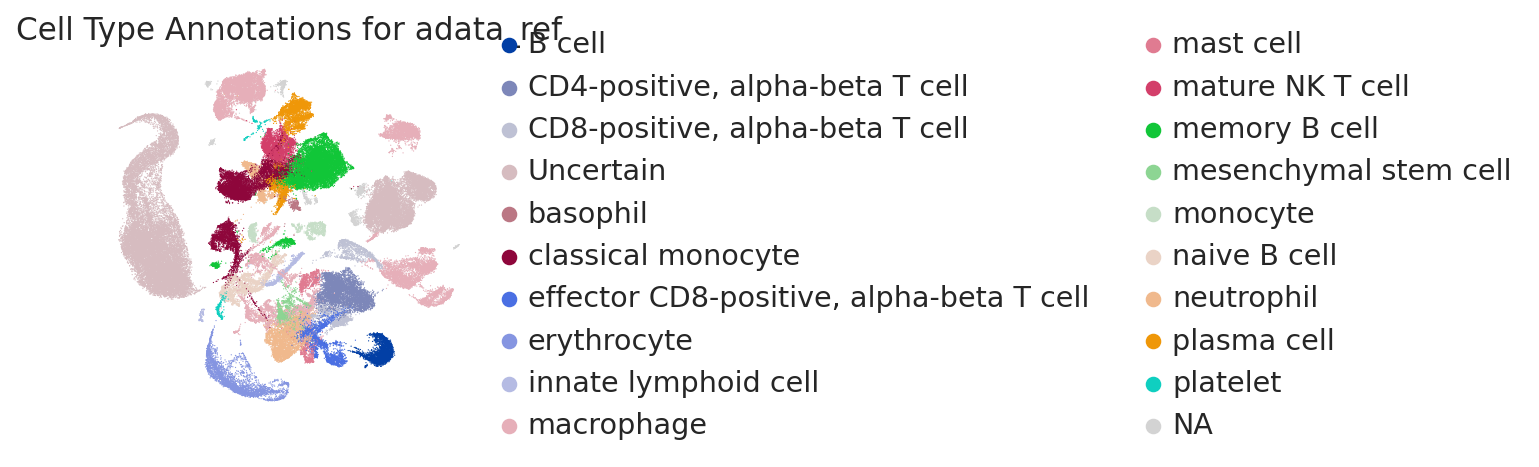

In [135]:
# You can visualize the Louvain clusters labeled with cell types 
sc.pl.umap(adata_ref, color=['cell_type'], title='Cell Type Annotations for adata_ref')

In [142]:
#Now assign clusters based on the annotation of the max number of cells in the cluster
cluster_celltype_counts_hum
cluster_to_celltype_mapping_hum

{'0': 'Uncertain',
 '1': 'memory B cell',
 '2': 'Uncertain',
 '3': 'classical monocyte',
 '4': 'CD4-positive, alpha-beta T cell',
 '5': 'macrophage',
 '6': 'neutrophil',
 '7': 'Uncertain',
 '8': 'erythrocyte',
 '9': 'mature NK T cell',
 '10': 'macrophage',
 '11': 'naive B cell',
 '12': 'plasma cell',
 '13': 'B cell',
 '14': 'Uncertain',
 '15': 'macrophage',
 '16': 'classical monocyte',
 '17': 'effector CD8-positive, alpha-beta T cell',
 '18': 'Uncertain',
 '19': 'plasma cell',
 '20': 'neutrophil',
 '21': 'macrophage',
 '22': 'mast cell',
 '23': 'macrophage',
 '24': 'CD8-positive, alpha-beta T cell',
 '25': 'CD8-positive, alpha-beta T cell',
 '26': 'macrophage',
 '27': 'mesenchymal stem cell',
 '28': 'macrophage',
 '29': 'monocyte',
 '30': 'innate lymphoid cell',
 '31': 'memory B cell',
 '32': 'macrophage',
 '33': 'monocyte',
 '34': 'platelet',
 '35': 'basophil'}

In [146]:
#BRUTE FORCE METHOD

cluster_celltype_counts_hum = pd.crosstab(adata_hum.obs['louvain'], adata_hum.obs['cell_type'])

# Create a dictionary to map Louvain clusters to the most prevalent cell type in adata_hum
cluster_to_celltype_mapping_hum = {}
for cluster_idx, row in cluster_celltype_counts_hum.iterrows():
    most_prevalent_cell_type_hum = row.idxmax()
    cluster_to_celltype_mapping_hum[cluster_idx] = most_prevalent_cell_type_hum

# Assign cell types to the Louvain clusters in adata_ref based on the mapping for adata_hum
adata_ref.obs['cell_type'] = adata_ref.obs['louvain'].map(cluster_to_celltype_mapping_hum)

... storing 'cell_type' as categorical
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/Apps/mambaforge-pypy3/envs/compare/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


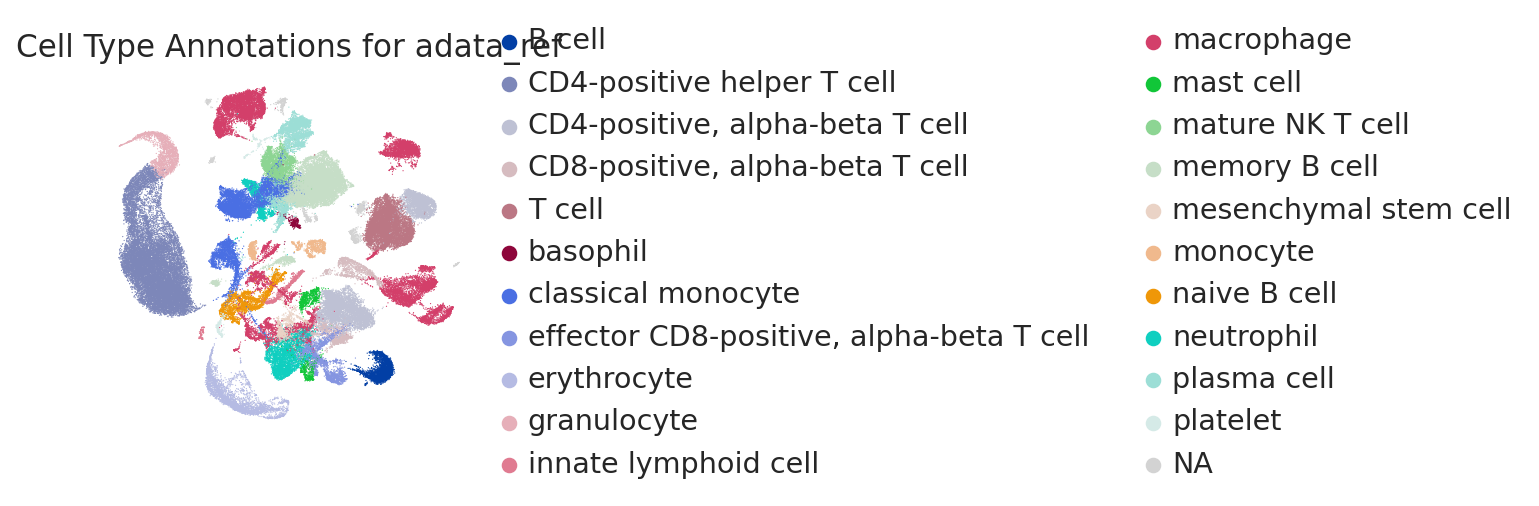

In [147]:
# You can visualize the Louvain clusters labeled with cell types
sc.pl.umap(adata_ref, color=['cell_type'], title='Cell Type Annotations for adata_ref')

In [148]:
#Now assign the pl cells cell_Type names based on cluster annotation -TBD ON MONDAY
# Create a dictionary mapping Louvain clusters to cell types in adata_ref
louvain_to_celltype_mapping_ref = dict(zip(adata_ref.obs['louvain'], adata_ref.obs['cell_type']))

# Match Louvain clusters in adata_pl_common to those in adata_ref
adata_pl_common['louvain_ref'] = adata_pl_common.obs['louvain'].map(louvain_to_celltype_mapping_ref)

# Assign cell type annotations to 'PL' cells in adata_pl_common based on Louvain clusters
adata_pl_common.obs['cell_type'] = adata_pl_common['louvain_ref']

# Drop the 'louvain_ref' column if you no longer need it
adata_pl_common.obs.drop(columns=['louvain_ref'], inplace=True)


KeyError: 'louvain'